In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.spatial import ConvexHull
import plotly.express as px

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
df = pd.read_csv("../data/clean_data_final.csv").drop("Unnamed: 0", axis=1)
#df.dropna(inplace=True)

In [5]:
df

,cluster,how_old_are_you,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry,payed,harmonized_salary,adjusted_annual_salary
0,3,25-34,5-7 years,5-7 years,Master's degree,Woman,Education,bad payed,55000.0,0.885018
1,0,25-34,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,well payed,68796.0,1.793468
2,0,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,bad payed,34000.0,0.547102
3,0,25-34,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,bad payed,62000.0,0.997657
4,0,25-34,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,bad payed,60000.0,0.965475
...,...,...,...,...,...,...,...,...,...,...
22883,0,25-34,5-7 years,5-7 years,College degree,Woman,Unidentified,well payed,85000.0,1.367756
22884,2,35-44,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,bad payed,40000.0,0.643650
22885,2,25-34,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,very well payed,148000.0,2.381504
22886,0,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,well payed,65000.0,1.045931


# EDA monovariate

## Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

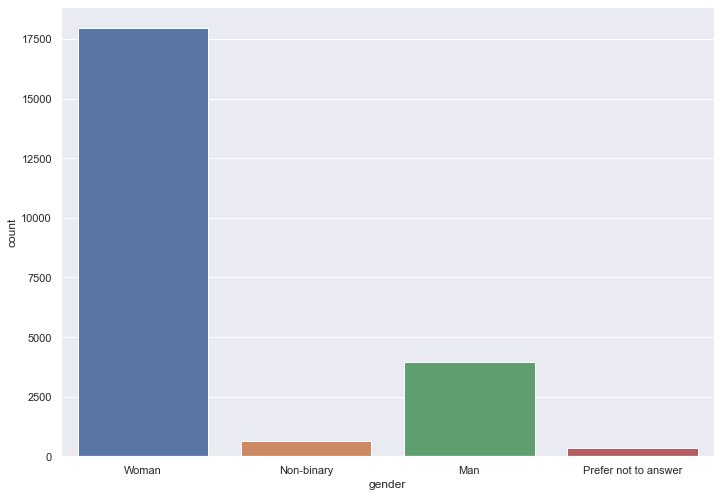

In [8]:
sns.countplot(data=df, x="gender")

In [21]:
px.pie(data_frame=df.groupby("gender").size(), values=0, names=df.groupby("gender").size().index,
       color=df.groupby("gender").size().index, 
       color_discrete_map={'Prefer not to answer':'lightcyan',
                                 'Woman':'cyan',
                                 'Non-binary':'royalblue',
                                 'Man':'darkblue'}
      )

## Salary

<AxesSubplot:xlabel='harmonized_salary', ylabel='Count'>

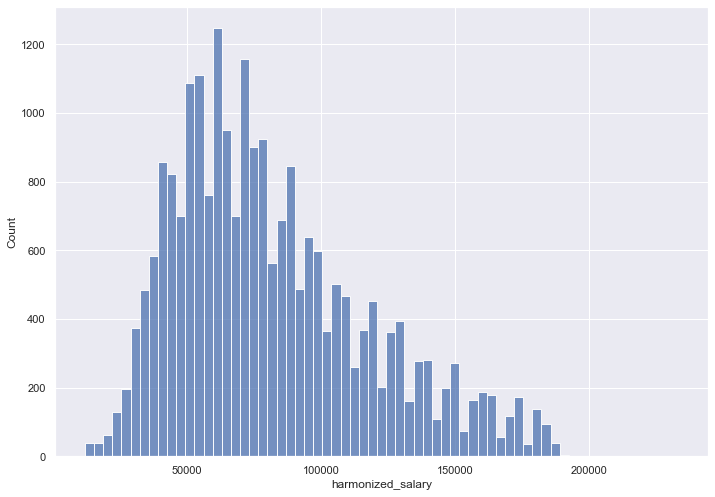

In [23]:
sns.histplot(data=df, x="harmonized_salary")

## Age

<AxesSubplot:xlabel='how_old_are_you', ylabel='count'>

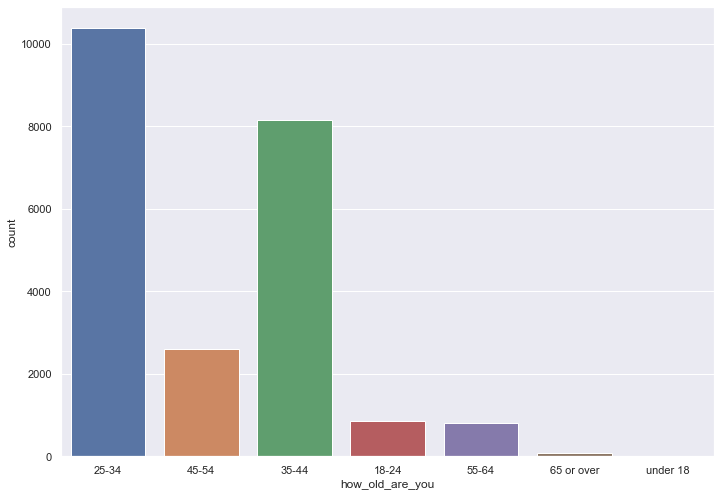

In [22]:
sns.countplot(data=df, x="how_old_are_you")

## Years of experience

<AxesSubplot:xlabel='years_of_experience_in_field', ylabel='count'>

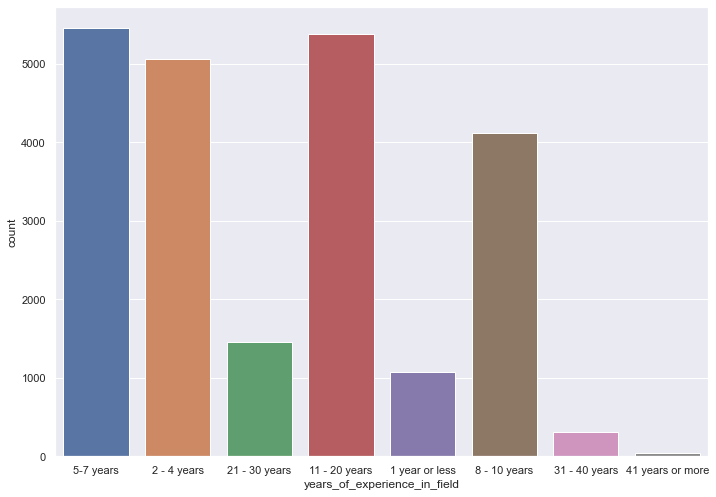

In [6]:
sns.countplot(data=df, x="years_of_experience_in_field")

## Overall years of experience

<AxesSubplot:xlabel='overall_years_of_professional_experience', ylabel='count'>

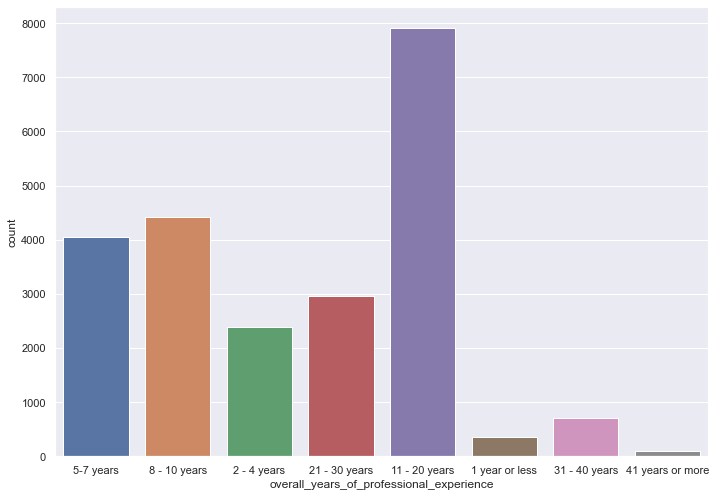

In [7]:
sns.countplot(data=df, x="overall_years_of_professional_experience")

## Diploma 

<AxesSubplot:xlabel='highest_level_of_education_completed', ylabel='count'>

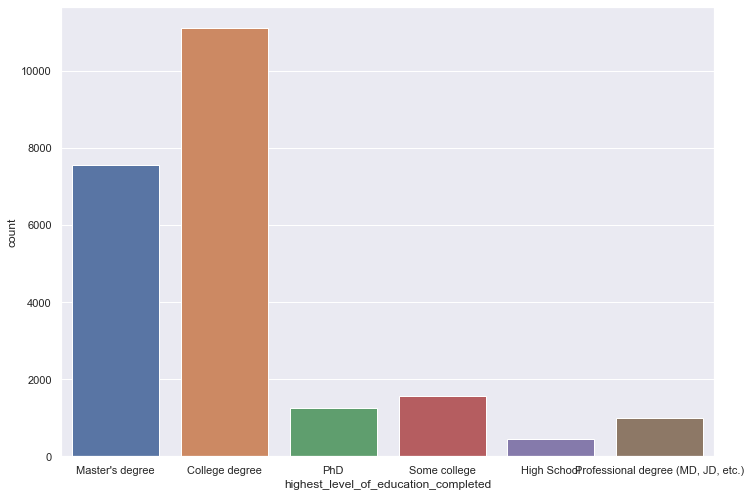

In [24]:
sns.countplot(data=df, x="highest_level_of_education_completed")

## Industry

<AxesSubplot:xlabel='count', ylabel='industry'>

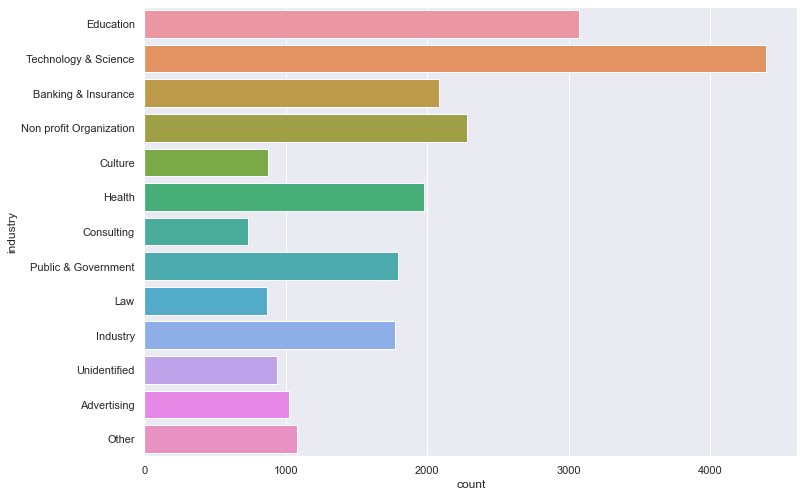

In [9]:
sns.countplot(data=df, y="industry")

# EDA bivariate

## Salary by gender

<AxesSubplot:xlabel='gender', ylabel='harmonized_salary'>

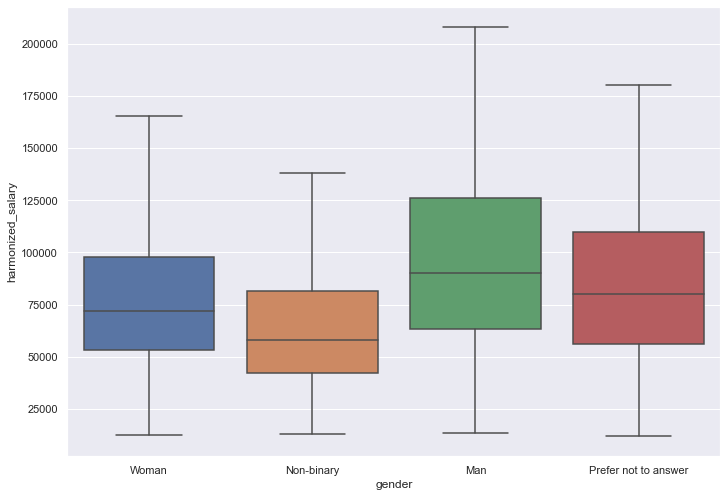

In [16]:
sns.boxplot(data=df, x="gender", y="harmonized_salary", showfliers=False)

## Salary by diploma

<AxesSubplot:xlabel='highest_level_of_education_completed', ylabel='harmonized_salary'>

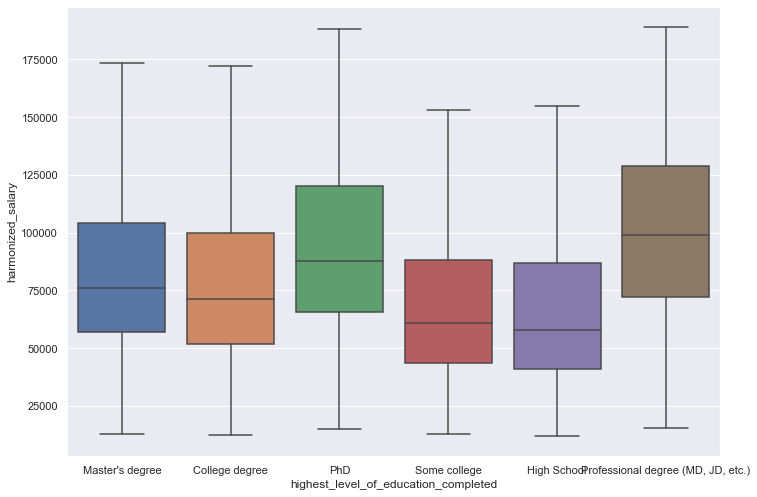

In [17]:
sns.boxplot(data=df, x="highest_level_of_education_completed", y="harmonized_salary", showfliers=False)

## Salary by age

<AxesSubplot:xlabel='how_old_are_you', ylabel='harmonized_salary'>

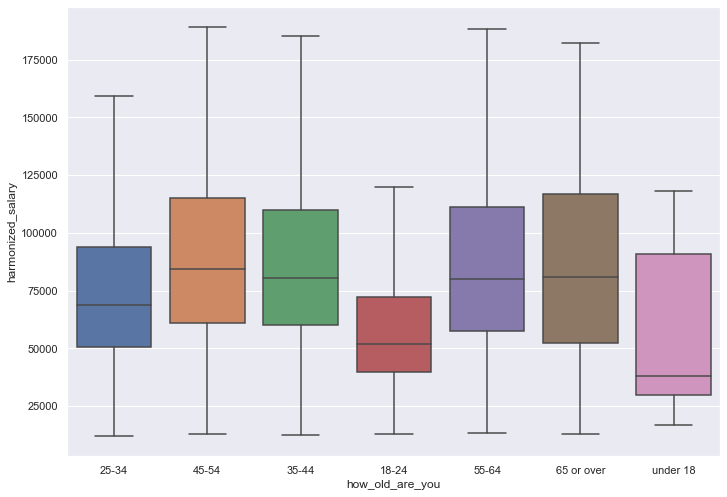

In [23]:
sns.boxplot(data=df, x="how_old_are_you", y="harmonized_salary", showfliers=False)

## Salary by years of experience in field

<AxesSubplot:xlabel='years_of_experience_in_field', ylabel='harmonized_salary'>

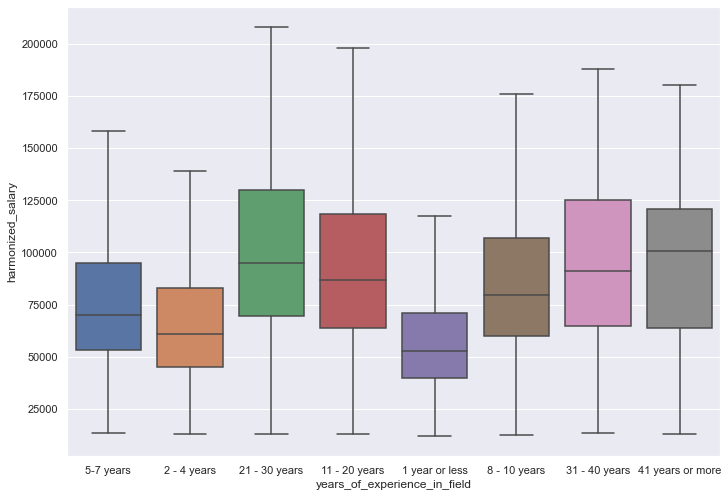

In [18]:
sns.boxplot(data=df, x="years_of_experience_in_field", y="harmonized_salary", showfliers=False)

## Salary by years of professional experience

<AxesSubplot:xlabel='overall_years_of_professional_experience', ylabel='harmonized_salary'>

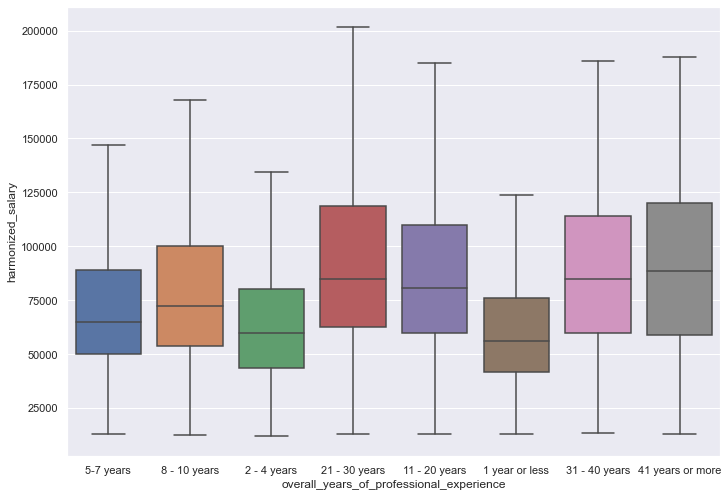

In [19]:
sns.boxplot(data=df, x="overall_years_of_professional_experience", y="harmonized_salary", showfliers=False)

## Salary by industry

<AxesSubplot:xlabel='harmonized_salary', ylabel='industry'>

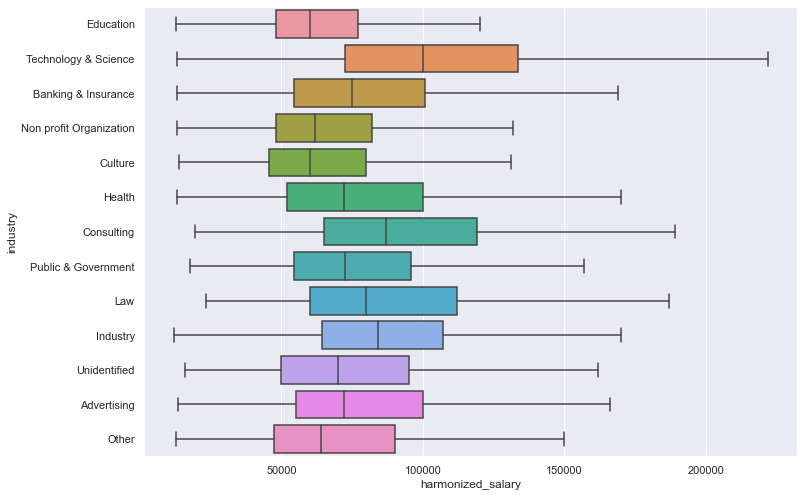

In [20]:
sns.boxplot(data=df, y="industry", x="harmonized_salary", showfliers=False)

# EDA Multivariate

In [125]:
df = pd.read_csv("../data/survey_with_cluster.csv")

In [126]:
transfo = pd.read_csv("../data/mca_columns_cooridnates_with_cluster.csv").drop("Unnamed: 0", axis=1)
clusters = pd.read_csv("../data/mca_row_coordinates_with_cluster.csv").drop("Unnamed: 0", axis=1)

In [127]:
transfo.columns = ["index", "X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "color"]

In [128]:
clusters.columns = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "cluster"]

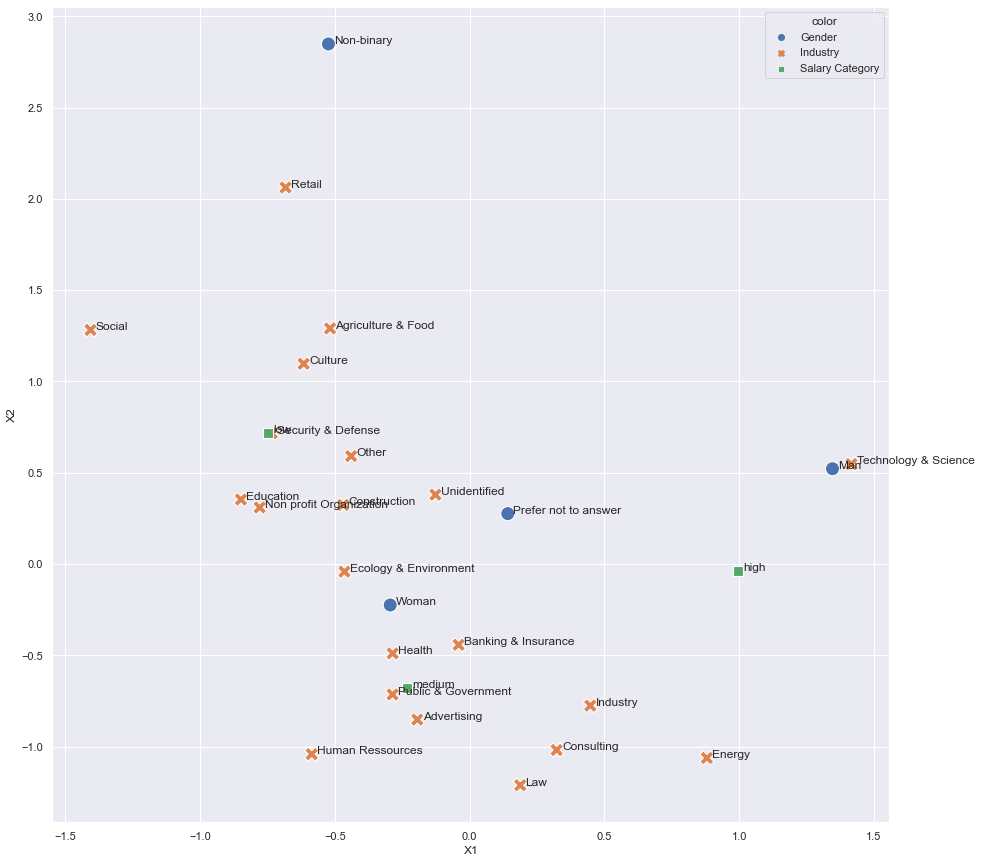

In [129]:
plt.figure(figsize=(15, 15))
ax = sns.scatterplot(data=transfo, x="X1", y="X2", hue="color", s=200, style="color")
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(transfo["X1"], transfo["X2"], transfo["index"], plt.gca())  
plt.show()

<AxesSubplot:xlabel='X1', ylabel='X2'>

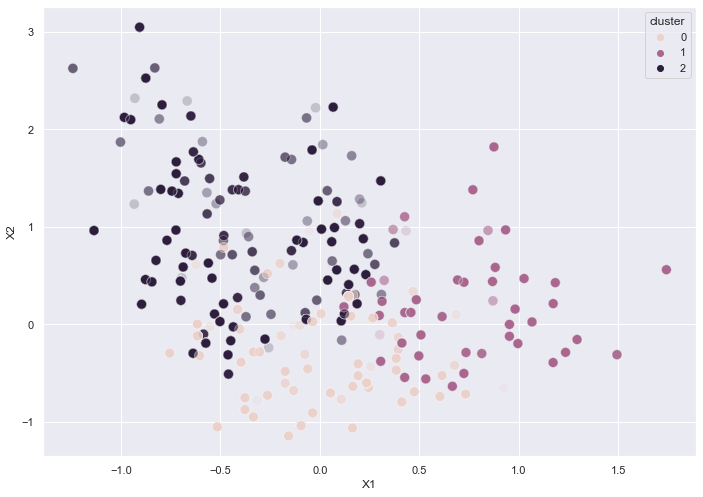

In [130]:
sns.scatterplot(data=clusters, x="X1", y="X2", s=100, hue="cluster",alpha=0.2)

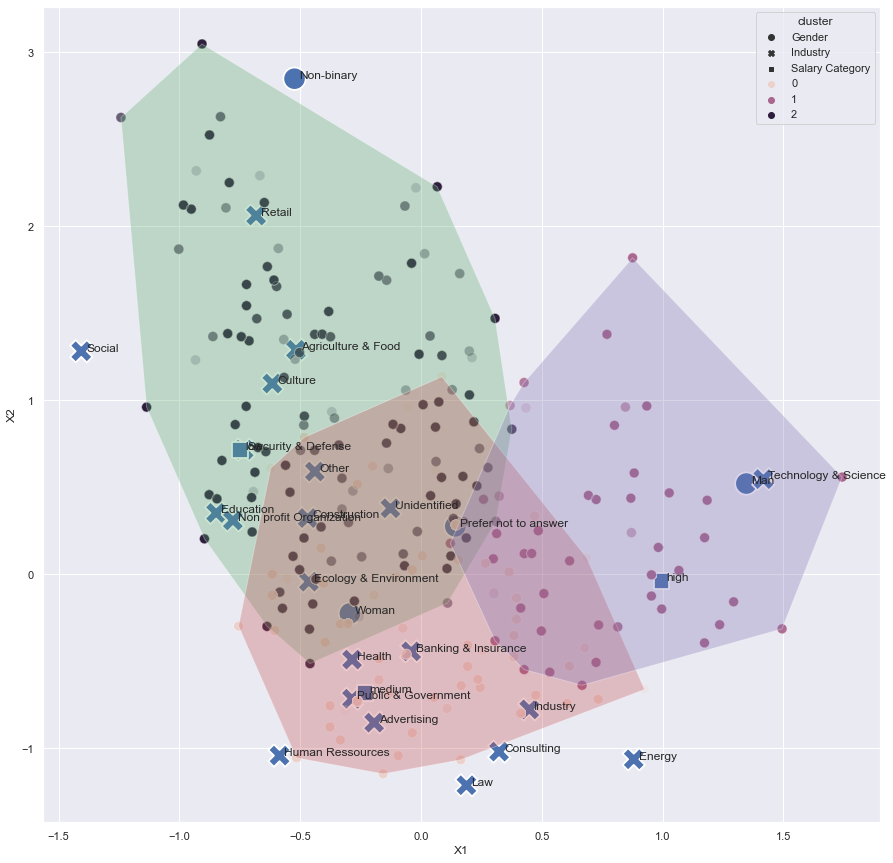

In [131]:
i="X1"
j="X2"
plt.figure(figsize=(15, 15))
ax = sns.scatterplot(data=transfo, x=i, y=j, style="color", s=500)
sns.scatterplot(data=clusters, x=i, y=j, s=100, alpha=0.2, hue="cluster")
for i_s in clusters["cluster"].unique():
    points = clusters[clusters["cluster"] == i_s][[i, j]].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3)
    
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(transfo[i], transfo[j], transfo["index"], plt.gca())  
plt.show()

In [132]:
colors = sns.color_palette('bright')[0:5]

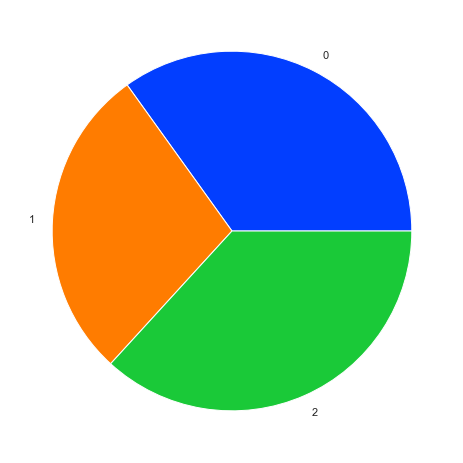

In [133]:
plt.pie(x=clusters.groupby("cluster").size(), labels=clusters.groupby("cluster").size().index, colors=colors)
plt.show()

In [134]:
df

,Unnamed: 0,harmonized_salary,how_old_are_you,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry cluster tf_idf_bigrams,category_salary,cluster
0,0,55000.0,25-34,5-7 years,5-7 years,Master's degree,Woman,Education,low,2
1,1,68796.0,25-34,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,medium,2
2,2,34000.0,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,low,2
3,3,62000.0,25-34,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,medium,0
4,4,60000.0,25-34,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,low,2
...,...,...,...,...,...,...,...,...,...,...
25642,25829,85000.0,25-34,5-7 years,5-7 years,College degree,Woman,Unidentified,medium,0
25643,25830,40000.0,35-44,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,low,2
25644,25831,148000.0,25-34,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,high,1
25645,25832,65000.0,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,medium,0


<AxesSubplot:xlabel='cluster', ylabel='count'>

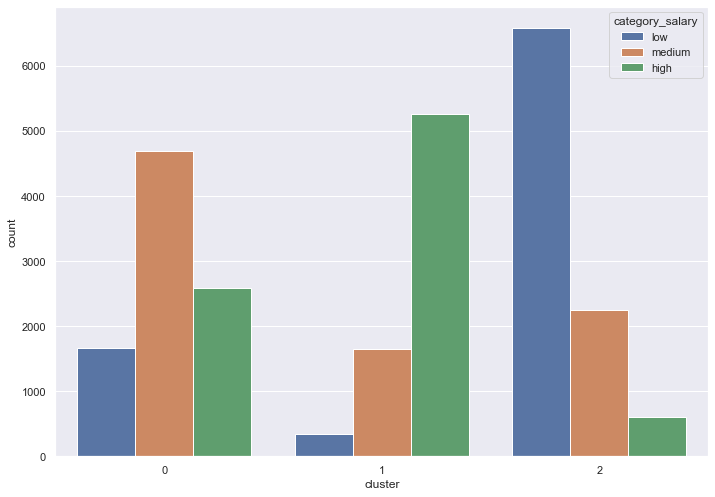

In [135]:
sns.countplot(data=df, hue="category_salary", x="cluster")

<AxesSubplot:xlabel='cluster', ylabel='count'>

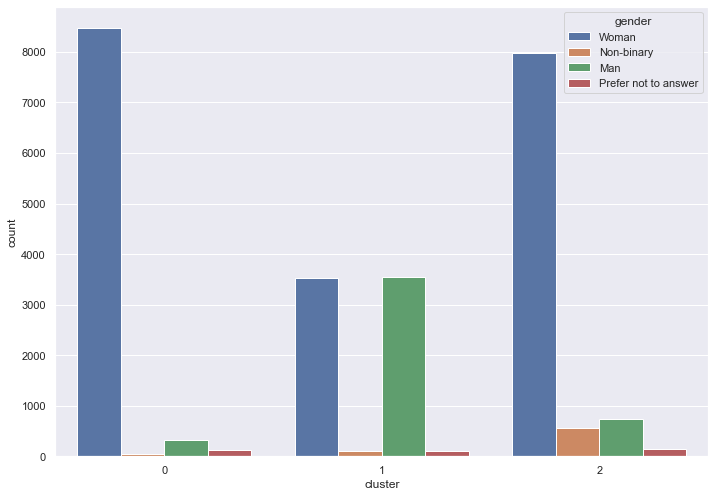

In [136]:
sns.countplot(data=df, hue="gender", x="cluster")

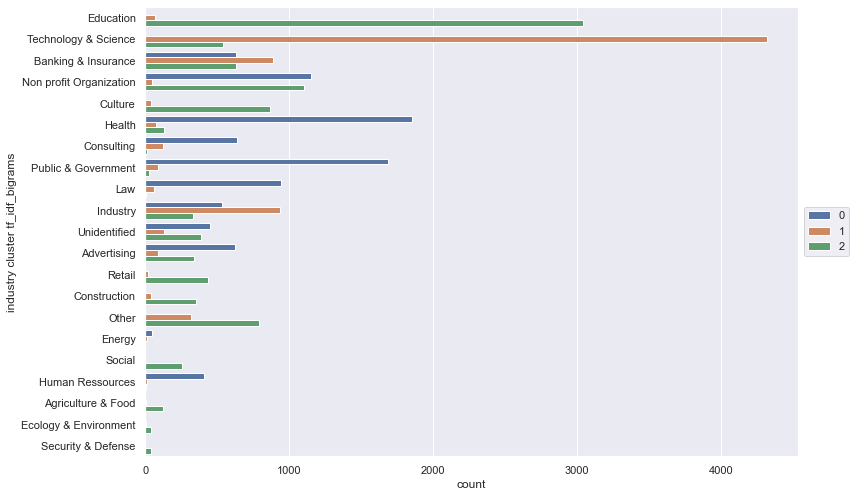

In [137]:
g = sns.countplot(data=df, y="industry cluster tf_idf_bigrams", hue="cluster")
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot:xlabel='cluster', ylabel='count'>

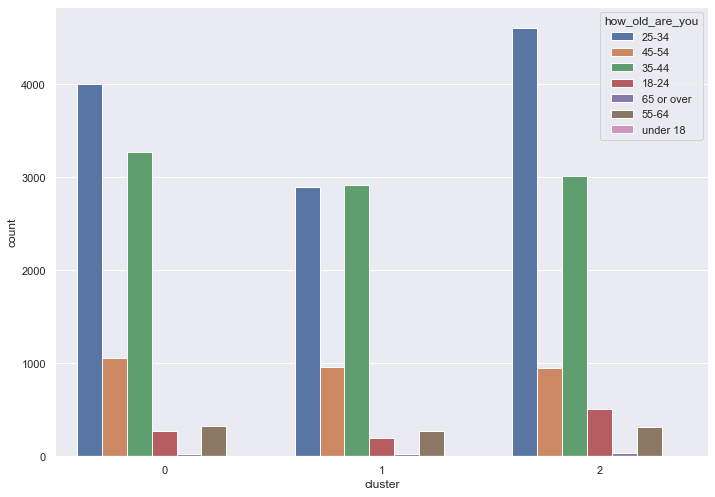

In [138]:
sns.countplot(data=df, hue="how_old_are_you", x="cluster")

<AxesSubplot:xlabel='cluster', ylabel='count'>

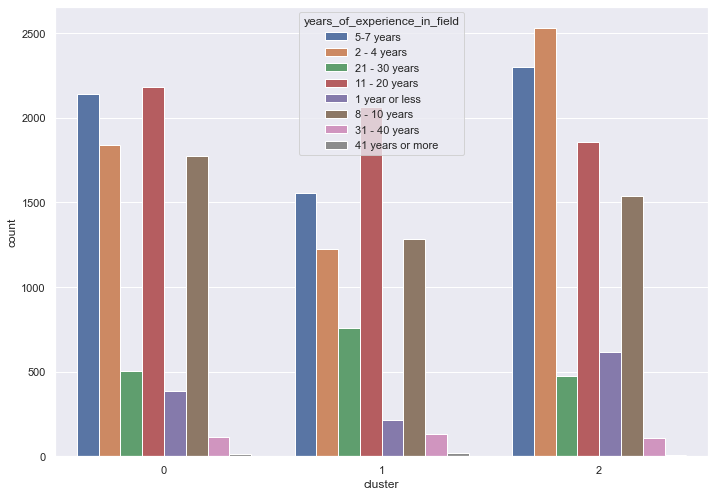

In [139]:
sns.countplot(data=df, hue="years_of_experience_in_field", x="cluster")

<AxesSubplot:xlabel='cluster', ylabel='count'>

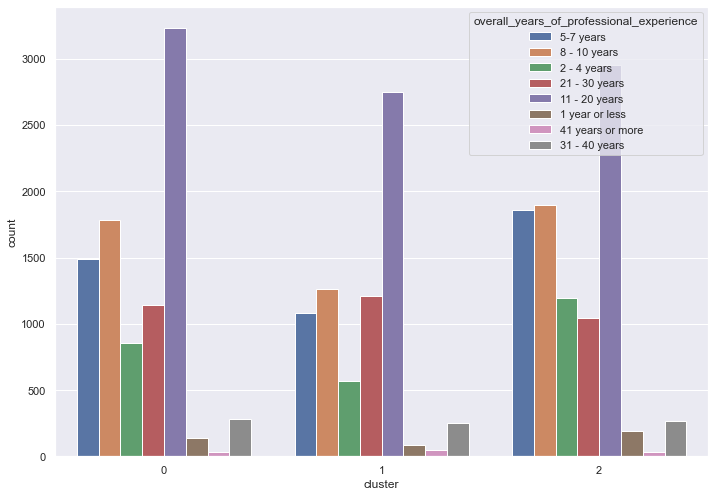

In [140]:
sns.countplot(data=df, hue="overall_years_of_professional_experience", x="cluster")

<AxesSubplot:xlabel='cluster', ylabel='count'>

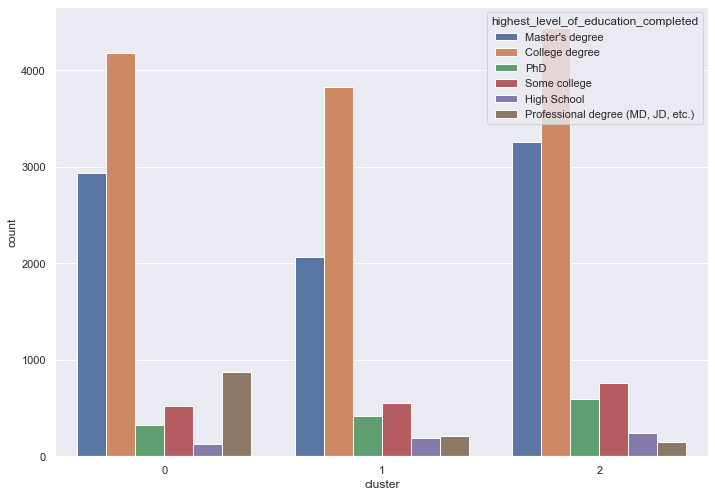

In [141]:
sns.countplot(data=df, hue="highest_level_of_education_completed", x="cluster")

In [142]:
df

,Unnamed: 0,harmonized_salary,how_old_are_you,overall_years_of_professional_experience,years_of_experience_in_field,highest_level_of_education_completed,gender,industry cluster tf_idf_bigrams,category_salary,cluster
0,0,55000.0,25-34,5-7 years,5-7 years,Master's degree,Woman,Education,low,2
1,1,68796.0,25-34,8 - 10 years,5-7 years,College degree,Non-binary,Technology & Science,medium,2
2,2,34000.0,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Banking & Insurance,low,2
3,3,62000.0,25-34,8 - 10 years,5-7 years,College degree,Woman,Non profit Organization,medium,0
4,4,60000.0,25-34,8 - 10 years,5-7 years,College degree,Woman,Banking & Insurance,low,2
...,...,...,...,...,...,...,...,...,...,...
25642,25829,85000.0,25-34,5-7 years,5-7 years,College degree,Woman,Unidentified,medium,0
25643,25830,40000.0,35-44,11 - 20 years,2 - 4 years,College degree,Woman,Non profit Organization,low,2
25644,25831,148000.0,25-34,11 - 20 years,11 - 20 years,Master's degree,Woman,Technology & Science,high,1
25645,25832,65000.0,25-34,2 - 4 years,2 - 4 years,College degree,Woman,Advertising,medium,0


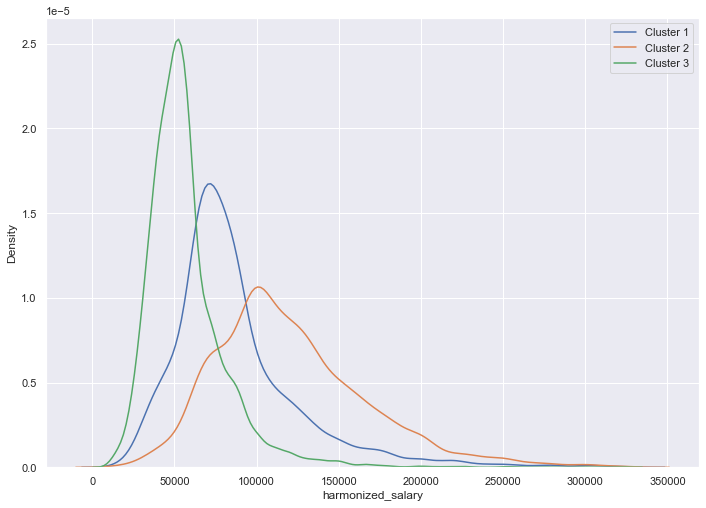

In [143]:
sns.kdeplot(df[df["cluster"]==0]["harmonized_salary"], label="Cluster 1")
sns.kdeplot(df[df["cluster"]==1]["harmonized_salary"], label="Cluster 2")
sns.kdeplot(df[df["cluster"]==2]["harmonized_salary"], label="Cluster 3")
plt.legend()
plt.show()